In [11]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("./dataset/train.csv")

In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25000 non-null  int64 
 1   reviews  25000 non-null  object
 2   target   25000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 586.1+ KB
None


In [26]:
train_1 = train[train["target"] == 4]

/var/folders/sk/psgbbsdd7y55t7_j82g1lgrw0000gn/T/ipykernel_3438/201439028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1["len"] = train_1["reviews"].str.len()


<AxesSubplot:xlabel='len', ylabel='len'>

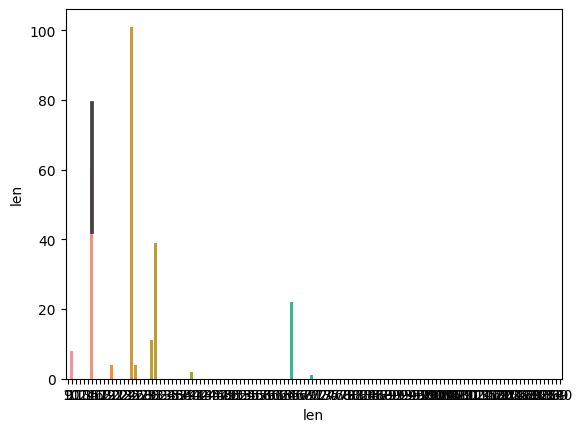

In [27]:
train_1["len"] = train_1["reviews"].str.len()
sb.barplot(x="len", y= train_1["len"].value_counts(), data=train_1)